In [1]:
import ROOT
from T2KStyle import T2KStyle
c = ROOT.TCanvas('c', '', 800, 600)
cl = ROOT.TCanvas('cl', '', 1600, 1200)
cw = ROOT.TCanvas('c2', '', 1600, 600)

Welcome to JupyROOT 6.20/06
Style for publication/paper


In [2]:
path = '~/LXPLUS/DESY_testbeam/xtalk/'
# path = '/eos/user/s/ssuvorov/DESY_testbeam/cosmic_strict_v2/'
voltage = '360'

pref = 'iter9'

file = [ROOT.TFile(path + '/g_360_200_' + pref + '.root')]
file.append(ROOT.TFile(path + '//g_380_200_' + pref + '.root'))
file.append(ROOT.TFile(path + '/mm1_360V_200ns_' + pref + '.root'))
file.append(ROOT.TFile(path + '/mm1_380V_200ns_' + pref + '.root'))
file.append(ROOT.TFile(path + '/er2_360V_' + pref + '.root'))
file.append(ROOT.TFile(path + '/er2_380V_' + pref + '.root'))
file.append(ROOT.TFile(path + '/er3_360V_' + pref + '.root'))
file.append(ROOT.TFile(path + '/er3_380V_' + pref + '.root'))

# file.append(ROOT.TFile('~/LXPLUS/DESY_testbeam/multi_pad/c_0d_0p2T_200ns_50Mhz_dedx.root'))
file.append(ROOT.TFile(path + '/c_0d_0T_200ns_25Mhz_' + pref + '.root'))

file.append(ROOT.TFile(path + '/mm1_nov_360_' + pref + '.root'))
file.append(ROOT.TFile(path + '/mm1_nov_370_' + pref + '.root'))
file.append(ROOT.TFile(path + '/mm1_nov_380_' + pref + '.root'))

name = ['DESY beam 360V', # 0
        'DESY beam 380V', # 1
        'MM1 360V', #2
        'MM1 380V', #3
        'ERAM2 360V', #4
        'ERAM2 380V', #5
        'ERAM3 360V', #6
        'ERAM3 380V', #7
        'DESY_cosmic 360V', #8
        'MM1 November 360V', #9
        'MM1 November 370V', #10
        'MM1 November 380V'] #11
color = [ROOT.kBlack, ROOT.kRed, ROOT.kGreen, ROOT.kBlue, ROOT.kViolet, ROOT.kCyan, ROOT.kMagenta, ROOT.kYellow]

Error in <TFile::TFile>: file /Users/ssuvorov/LXPLUS/DESY_testbeam/xtalk//g_360_200_iter9.root does not exist
Error in <TFile::TFile>: file /Users/ssuvorov/LXPLUS/DESY_testbeam/xtalk///g_380_200_iter9.root does not exist


In [3]:
# 360V
file_list = [0, 2, 4, 6, 8, 9]
# 380V
#file_list = [1, 3, 5, 7, 11]

### dT with leading pad

In [12]:
%jsroot on
cl.Clear()
cl.Divide(2, 2)

hs = [ROOT.THStack('time_1st', ''), ROOT.THStack('time_2nd', ''), ROOT.THStack('time_3nd', ''), ROOT.THStack('time_4nd', '')]
title = ['t_{2}-t_{1} [time bins]', 't_{3}-t_{1} [time bins]', 't_{4}-t_{1} [time bins]', 't_{5}-t_{1} [time bins]']
var = ['pad_time[1][]-pad_time[0][]', 'pad_time[2][]-pad_time[0][]', 'pad_time[3][]-pad_time[0][]', 'pad_time[4][]-pad_time[0][]']
cut = ['multiplicity > 1', 'multiplicity > 2', 'multiplicity > 3', 'multiplicity > 4']

for num, i in enumerate(file_list):
    for dt_id in range(4):
        dt_h = ROOT.TH1F(f'dt_h_{i}_{dt_id}', '', 300, -150., 150.)
        x = file[i].outtree.Project(f'dt_h_{i}_{dt_id}', var[dt_id], cut[dt_id], '')
        if dt_h.Integral() != 0: dt_h.Scale(1./dt_h.Integral())
        dt_h.SetTitle(name[i])
        dt_h.SetLineColor(color[num])
        hs[dt_id].Add(dt_h)
        
for dt_id in range(4):
    cl.cd(dt_id+1)
    hs[dt_id].Draw('histo nostack')
    hs[dt_id].GetXaxis().SetTitle(title[dt_id])
    hs[dt_id].SetMinimum(1e-4)
    hs[dt_id].GetXaxis().SetRangeUser(-60, 80)
    ROOT.gPad.SetLogy()
    ROOT.gPad.SetGrid()
    ROOT.gPad.BuildLegend()

cl.Draw()

Warning in <TFile::Append>: Replacing existing TH1: dt_h_0_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: dt_h_0_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: dt_h_0_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: dt_h_0_3 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: dt_h_2_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: dt_h_2_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: dt_h_2_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: dt_h_2_3 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: dt_h_4_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: dt_h_4_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: dt_h_4_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: dt

### dT vs Charge

working on file 1 of 4
working on file 2 of 4
working on file 3 of 4
working on file 4 of 4


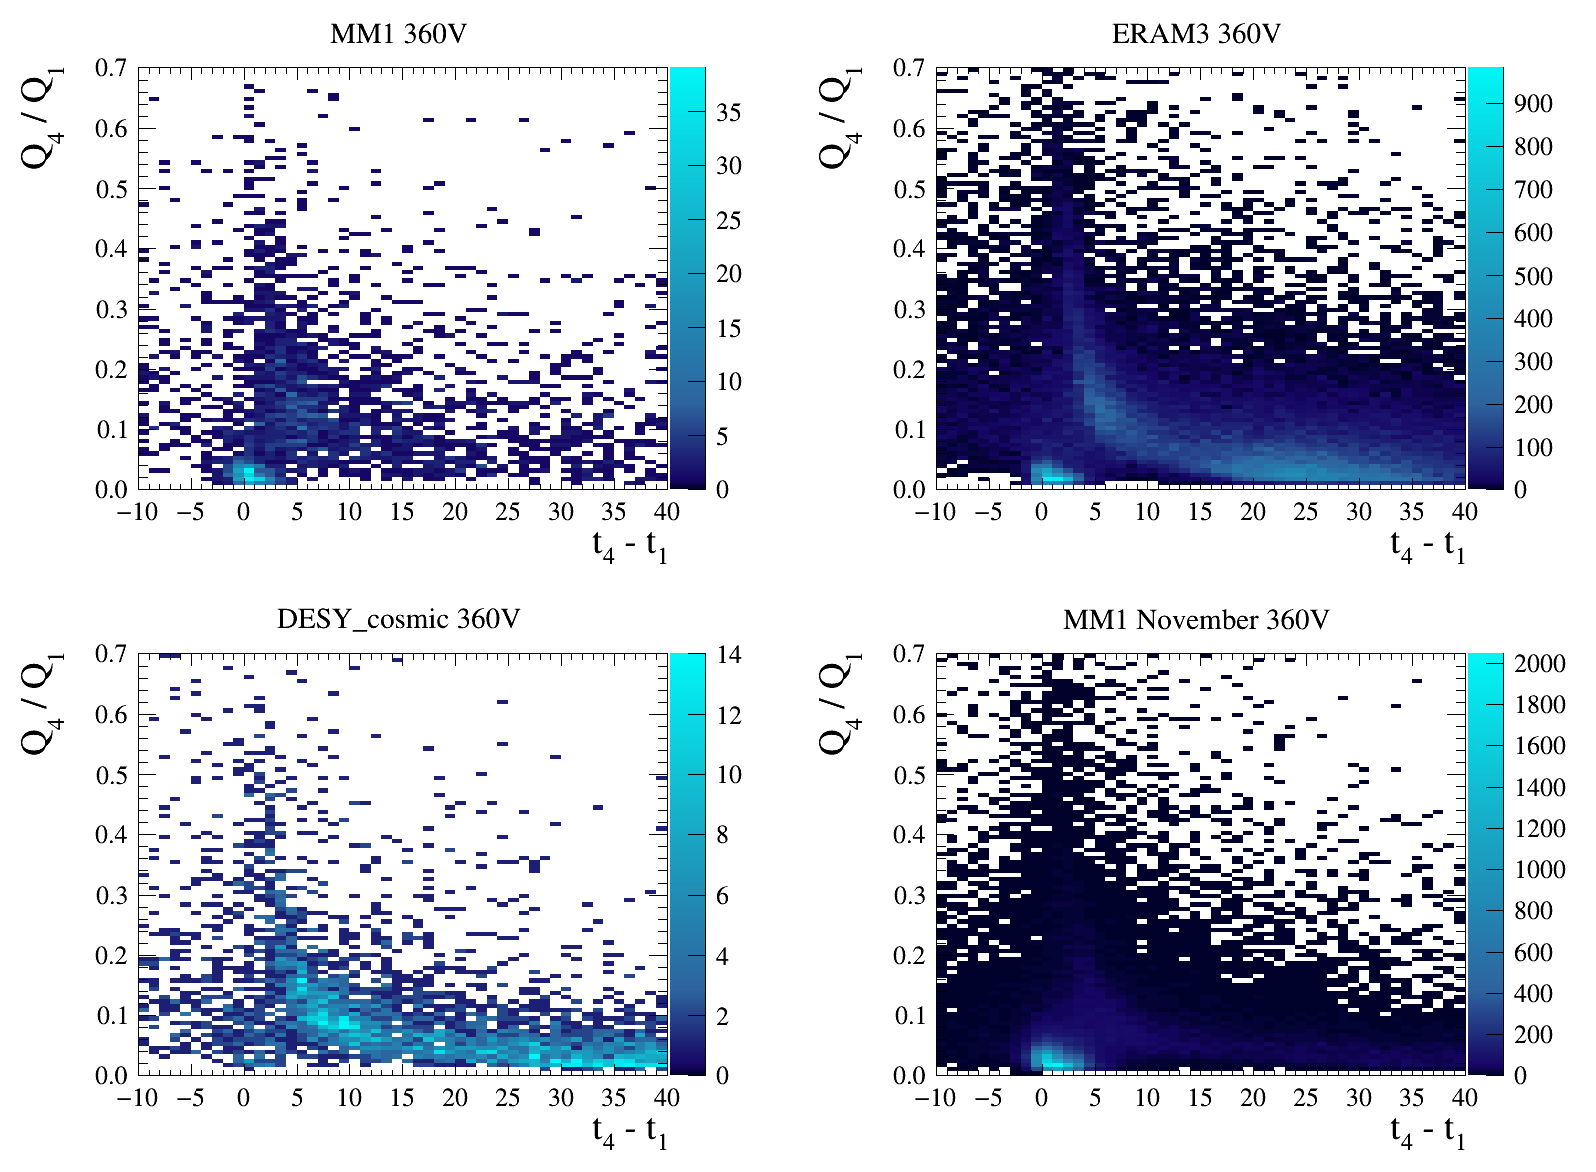

In [5]:
cl.Clear()
cl.Divide(2, 2)

h = []
pad = 3
fl = [2, 6, 8, 9]
#fl = [3, 5, 7, 11]
for num, f in enumerate(fl):
    print('working on file', num+1, 'of', len(fl))
    h.append(ROOT.TH2F(f'h_{num}', '', 50, -10., 40., 100, 0.,  0.7))
    file[f].outtree.Project(f'h_{num}', f'pad_charge[{pad}][] / pad_charge[0][]: pad_time[{pad}][] - pad_time[0][]', f'multiplicity > {pad-1} && pad_time[{pad}][] > 0')
    h[-1].SetTitle(name[f])
    h[-1].GetXaxis().SetTitle('t_{' + str(pad+1) + '} - t_{1}')
    h[-1].GetYaxis().SetTitle('Q_{' + str(pad+1) + '} / Q_{1}')
    cl.cd(num+1)
    h[-1].Draw('colz')
    
cl.Draw()

### Cross talk probability

In [17]:
%jsroot on
ROOT.gStyle.SetOptTitle(0)
cl.Clear()
cl.Divide(2, 2)
def setup(ll, f, num):
    for p in ll:
        p.append(ROOT.TProfile(f'cross_{f}_{num}', '360V', 20, 0 ,5000))
        p[-1].SetMarkerColor(color[num])
        p[-1].SetLineColor(color[num])
        p[-1].SetTitle(name[f])
cross = [[], [], [], []]
for num, f in enumerate(file_list):
    setup(cross, f, num)
    print('working on file', num+1, 'of', len(file_list))
    for entry in file[f].outtree:
        for i in range(len(entry.charge)):
            xtalk2 =  True if entry.pad_charge[i + 36*1] > 0 and abs(entry.pad_time[i + 36*1]-entry.pad_time[i])<4  and entry.pad_charge[i + 36*1]/entry.pad_charge[i]<0.08 else False
            xtalk3 =  True if entry.pad_charge[i + 36*2] > 0 and abs(entry.pad_time[i + 36*2]-entry.pad_time[i])<4  and entry.pad_charge[i + 36*2]/entry.pad_charge[i]<0.08 else False
            xtalk4 =  True if entry.pad_charge[i + 36*3] > 0 and abs(entry.pad_time[i + 36*3]-entry.pad_time[i])<5 and entry.pad_charge[i + 36*3]/entry.pad_charge[i]<0.08 else False
            xtalk5 =  True if entry.pad_charge[i + 36*4] > 0 and abs(entry.pad_time[i + 36*4]-entry.pad_time[i])<5 and entry.pad_charge[i + 36*4]/entry.pad_charge[i]<0.08 else False

            cross[0][-1].Fill(entry.pad_charge[i + 36*0], xtalk2)
            cross[1][-1].Fill(entry.pad_charge[i + 36*0], xtalk3)
            cross[2][-1].Fill(entry.pad_charge[i + 36*0], xtalk4)
            cross[3][-1].Fill(entry.pad_charge[i + 36*0], xtalk5)

for i in range(4):
    cl.cd(i+1)
    cross[i][0].Draw()
    cross[i][0].GetYaxis().SetRangeUser(0., 1.)
    cross[i][0].GetXaxis().SetTitle('Q_{1}')
    cross[i][0].GetYaxis().SetTitle(f'{str(i+1)} pad cross-talk prob.')
    for x in cross[i][1:]:
        x.Draw('same')
    ROOT.gPad.BuildLegend()
cl.Draw()

working on file 1 of 5
working on file 2 of 5
working on file 3 of 5
working on file 4 of 5
working on file 5 of 5


Warning in <TFile::Append>: Replacing existing TH1: cross_1_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: cross_1_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: cross_1_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: cross_3_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: cross_3_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: cross_3_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: cross_5_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: cross_5_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: cross_5_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: cross_7_3 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: cross_7_3 (Potential memory leak).
Warning in <TFile::Append>: Replacing exist

### Croaa talk map

In [34]:
%jsroot on
cl.Clear()
cl.Divide(2, 2)

h2 = []
h_bg= []
fl = [9, 10, 11]
pad = 3
for num, f in enumerate(fl):
    h2.append(ROOT.TH2F('h2', '', 37, 0., 37., 37, 0., 37.))
    h_bg.append(ROOT.TH2F('h', '', 37, 0., 37., 37, 0., 37.))
    file[f].outtree.Project('h', 'pad_x[0][]:pad_y[0][]', f'pad_time[0][] > 0')
    file[f].outtree.Project('h2', 'pad_x[0][]:pad_y[0][]', f'abs(pad_time[{pad}][] - pad_time[0][]) < 4 && pad_charge[{pad}][] / pad_charge[0][] < 0.08 && pad_time[{pad}][] > 0')
    cl.cd(num+1)
    h2[-1].SetTitle(name[f])
    h2[-1].Divide(h_bg[-1])
    h2[-1].Draw('colz')

cl.Draw()

Warning in <TFile::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).


### Cross talk vs position in pad

In [51]:
%jsroot on
c.cd()
file_id = 11
pad_id = 2
h = ROOT.TH1F('h', '', 100, -1., 1., )
file[file_id].outtree.Project('h', f'100*dx[][0]', f'pad_charge[][{pad_id}] / pad_charge[][0] < 0.08 && abs(pad_time[][{pad_id}] - pad_time[][0]) < 4 && pad_time[][{pad_id}] > 0 && pad_y[][{pad_id}] > pad_y[][0]')
ht = ROOT.TH1F('ht', '', 100, -1., 1., )
file[file_id].outtree.Project('ht', '100*dx[][0]', 'pad_charge[][0] > 0')
h.Divide(ht)
h.Draw('')
h.GetYaxis().SetTitle(f'{pad_id+1} pad cross-talk prob')
h.GetXaxis().SetTitle('Position w.r.t. leading pad [cm]')
c.Draw()

Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: ht (Potential memory leak).
